In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random as rand
import numpy as np

#Read Data

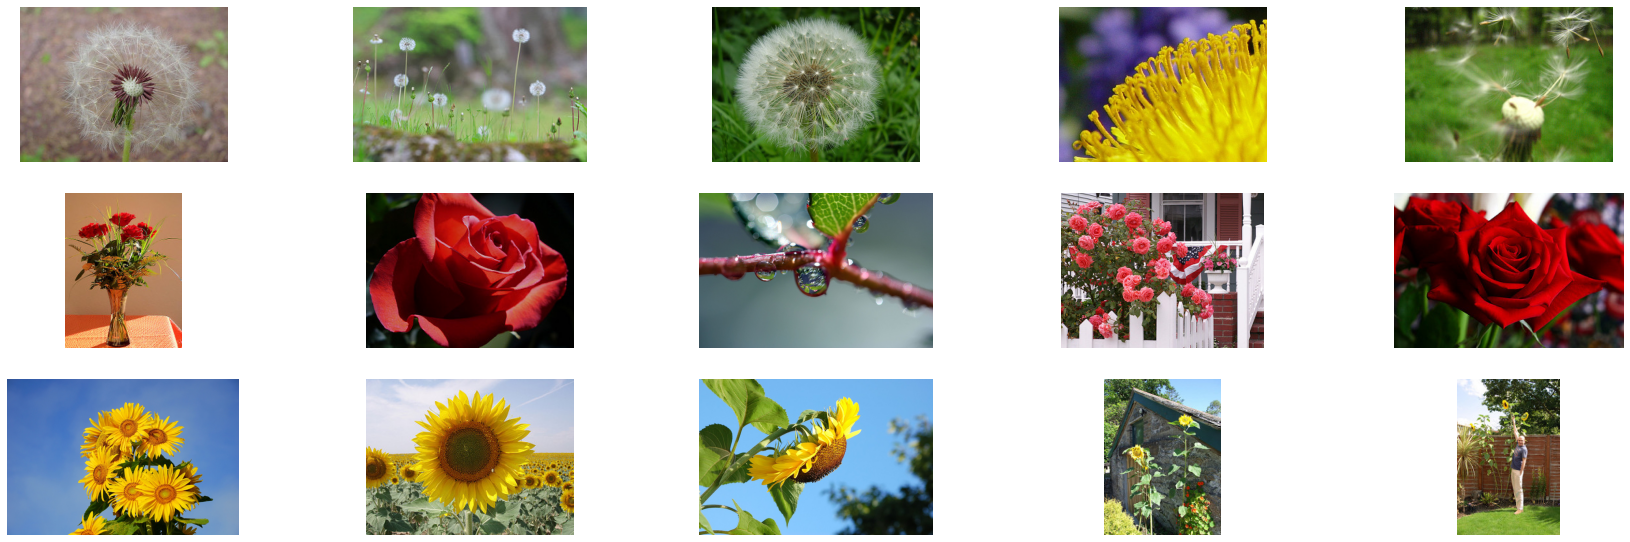

In [2]:
dandelion_train = '/content/drive/Shareddrives/ML/dandelion/train'
dandelion_test = '/content/drive/Shareddrives/ML/dandelion/test'

rose_train = '/content/drive/Shareddrives/ML/rose/train'
rose_test = '/content/drive/Shareddrives/ML/rose/test'

sunflower_train = '/content/drive/Shareddrives/ML/sunflower/train'
sunflower_test = '/content/drive/Shareddrives/ML/sunflower/test'

dandelion_file = os.listdir(dandelion_train)
dandelion_pict = [os.path.join(dandelion_train, files) for files in dandelion_file[:5]]
rose_file = os.listdir(rose_train)
rose_pict = [os.path.join(rose_train, files) for files in rose_file[:5]]
sunflower_file = os.listdir(sunflower_train)
sunflower_pict = [os.path.join(sunflower_train, files) for files in sunflower_file[:5]]

#Show Train Image
plt.figure(figsize=(30,20))
for i, image in enumerate(dandelion_pict+rose_pict+sunflower_pict):
    img = mpimg.imread(image)  
    plt.subplot(6, 5, i + 1)
    plt.axis('off')
    plt.imshow(img)

#Resize and Convert to Grayscale

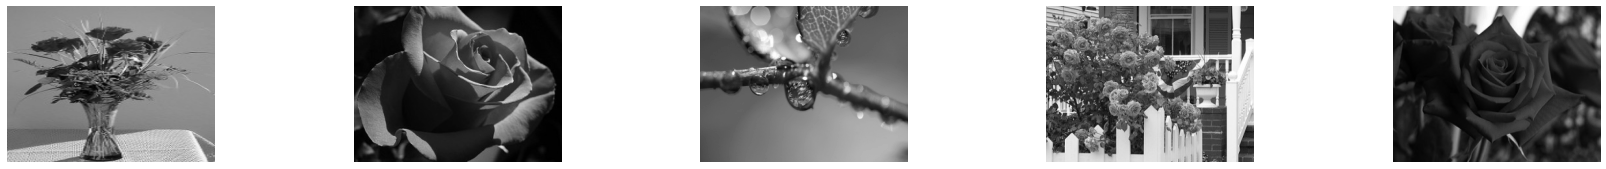

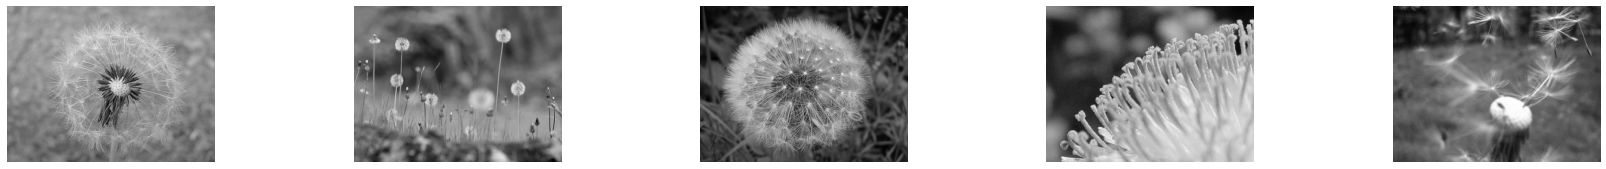

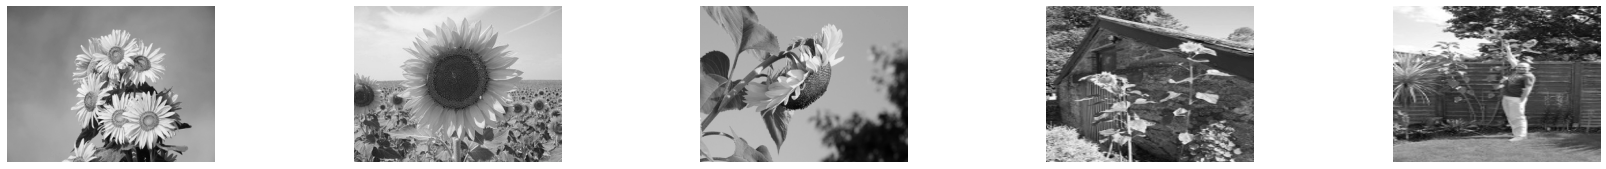

In [3]:
dandelion_test_file = os.listdir(dandelion_test)
rose_test_file = os.listdir(rose_test)
sunflower_test_file = os.listdir(sunflower_test)

def resize_cvt_to_gray (dir_path, name) :
  #Read Images
  images = []
  for filename in name:
      img = cv2.imread(os.path.join(dir_path,filename), cv2.IMREAD_UNCHANGED)
      images.append(img)

  #Resize and Convert to grays
  result_img = []
  size = (320,240)
  for i in range(len(images)):
    resize = cv2.resize(images[i], size, interpolation=cv2.INTER_LINEAR)
    gray_img = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
    result_img.append(gray_img)
  return result_img

#Convert and resize train img
resized_dandelion_train = resize_cvt_to_gray(dandelion_train, dandelion_file)
resized_rose_train = resize_cvt_to_gray(rose_train, rose_file)
resized_sunflower_train = resize_cvt_to_gray(sunflower_train, sunflower_file)
#Convert and resize test img
resized_dandelion_test = resize_cvt_to_gray(dandelion_test, dandelion_test_file)
resized_rose_test = resize_cvt_to_gray(rose_test, rose_test_file)
resized_sunflower_test = resize_cvt_to_gray(sunflower_test, sunflower_test_file)

def show_gray_img(image) :
  plt.figure(figsize=(30,20))
  for i in range(5) : 
    plt.subplot(6, 5, i + 1)
    plt.axis('off')
    plt.imshow(image[i], cmap='gray')

show_gray_img(resized_rose_train)
show_gray_img(resized_dandelion_train)
show_gray_img(resized_sunflower_train)

#Split data

In [4]:
#Sebelumya dalam google drive sudah dibagi ke dalam folder train dan test tiap kelas dengan rasio 80:20
#Bagian ini hanya memasukkanya ke array agar dapat diakses


x_train = []
y_train = []
for i in range(len(resized_dandelion_train)):
  x_train.append(resized_dandelion_train[i].flatten())
  x_train.append(resized_rose_train[i].flatten())
  x_train.append(resized_sunflower_train[i].flatten())
  y_train.append(0)
  y_train.append(1)
  y_train.append(2)

x_test = []
y_test = []

for i in range(len(resized_dandelion_test)):
  x_test.append(resized_dandelion_test[i].flatten())
  x_test.append(resized_rose_test[i].flatten())
  x_test.append(resized_sunflower_test[i].flatten())
  y_test.append(0)
  y_test.append(1)
  y_test.append(2)

#Train & Predict

In [5]:
#Import svm model
from sklearn import svm
from timeit import default_timer as timer

#Create a svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
start = timer()
clf.fit(x_train, y_train)
print("Training time =", timer()-start,"seconds")

#Predict the response for test dataset
y_pred = clf.predict(x_test)

Training time = 7.825268219000009 seconds


#Evaluation

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43333333333333335
